In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from libs.modul_encoding import LabelEncoder
from libs.modul_split_data import train_test_split, KFold
from libs.modul_decision_tree import DecisionTreeClassifier
from libs.modul_metrics import accuracy_score, classification_report, cross_val_score
from libs.modul_visualization import TreeVisualizer

### **LOAD DATA**

In [8]:
df = pd.read_csv('dataset/crop_recomend.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [9]:
feature_names = df.columns[:-1].tolist() 
X = df.iloc[:, :-1].values
y_raw = df['label'].values

In [10]:
encoder = LabelEncoder()
y = encoder.fit_transform(y_raw)

print(f"Jumlah Kelas Tanaman: {len(encoder.classes_)}")
print(f"Contoh Kelas: {encoder.classes_[:5]}")

Jumlah Kelas Tanaman: 22
Contoh Kelas: ['apple' 'banana' 'blackgram' 'chickpea' 'coconut']


### **SPLIT DATA**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"Jumlah Data Training: {len(X_train)} sampel")
print(f"Jumlah Data Testing:  {len(X_test)} sampel")

Jumlah Data Training: 1760 sampel
Jumlah Data Testing:  440 sampel


### **TRAIN MODEL**

In [23]:
clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=12,          
    min_samples_split=5,
    min_samples_leaf=2
)

print("Melakukan 5-Fold Cross Validation...")
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

print(f"CV Scores per fold: {cv_scores}")
print(f"Rata-rata Akurasi CV: {np.mean(cv_scores) * 100:.2f}%")


clf.fit(X_train, y_train)
print("Model berhasil dilatih!")

Melakukan 5-Fold Cross Validation...
CV Scores per fold: [0.97159091 0.96306818 0.96875    0.98295455 0.98011364]
Rata-rata Akurasi CV: 97.33%
Model berhasil dilatih!


In [ ]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi pada Data Test: {accuracy * 100:.2f}%\n")

report = classification_report(y_test, y_pred, target_names=encoder.classes_)
print(report)

Akurasi pada Data Test: 98.41%

              precision     recall   f1-score    support

       apple       1.00       1.00       1.00         20
      banana       1.00       1.00       1.00         20
   blackgram       0.91       1.00       0.95         20
    chickpea       0.95       1.00       0.98         20
     coconut       1.00       1.00       1.00         20
      coffee       1.00       1.00       1.00         20
      cotton       1.00       1.00       1.00         20
      grapes       1.00       1.00       1.00         20
        jute       0.95       0.90       0.92         20
 kidneybeans       1.00       0.95       0.97         20
      lentil       0.95       1.00       0.98         20
       maize       1.00       0.95       0.97         20
       mango       1.00       1.00       1.00         20
   mothbeans       0.95       0.90       0.92         20
    mungbean       1.00       1.00       1.00         20
   muskmelon       1.00       1.00       1.00         2

### **VISUALIZATION**

#### Decision Tree Structure

1. STRUKTUR DECISION TREE


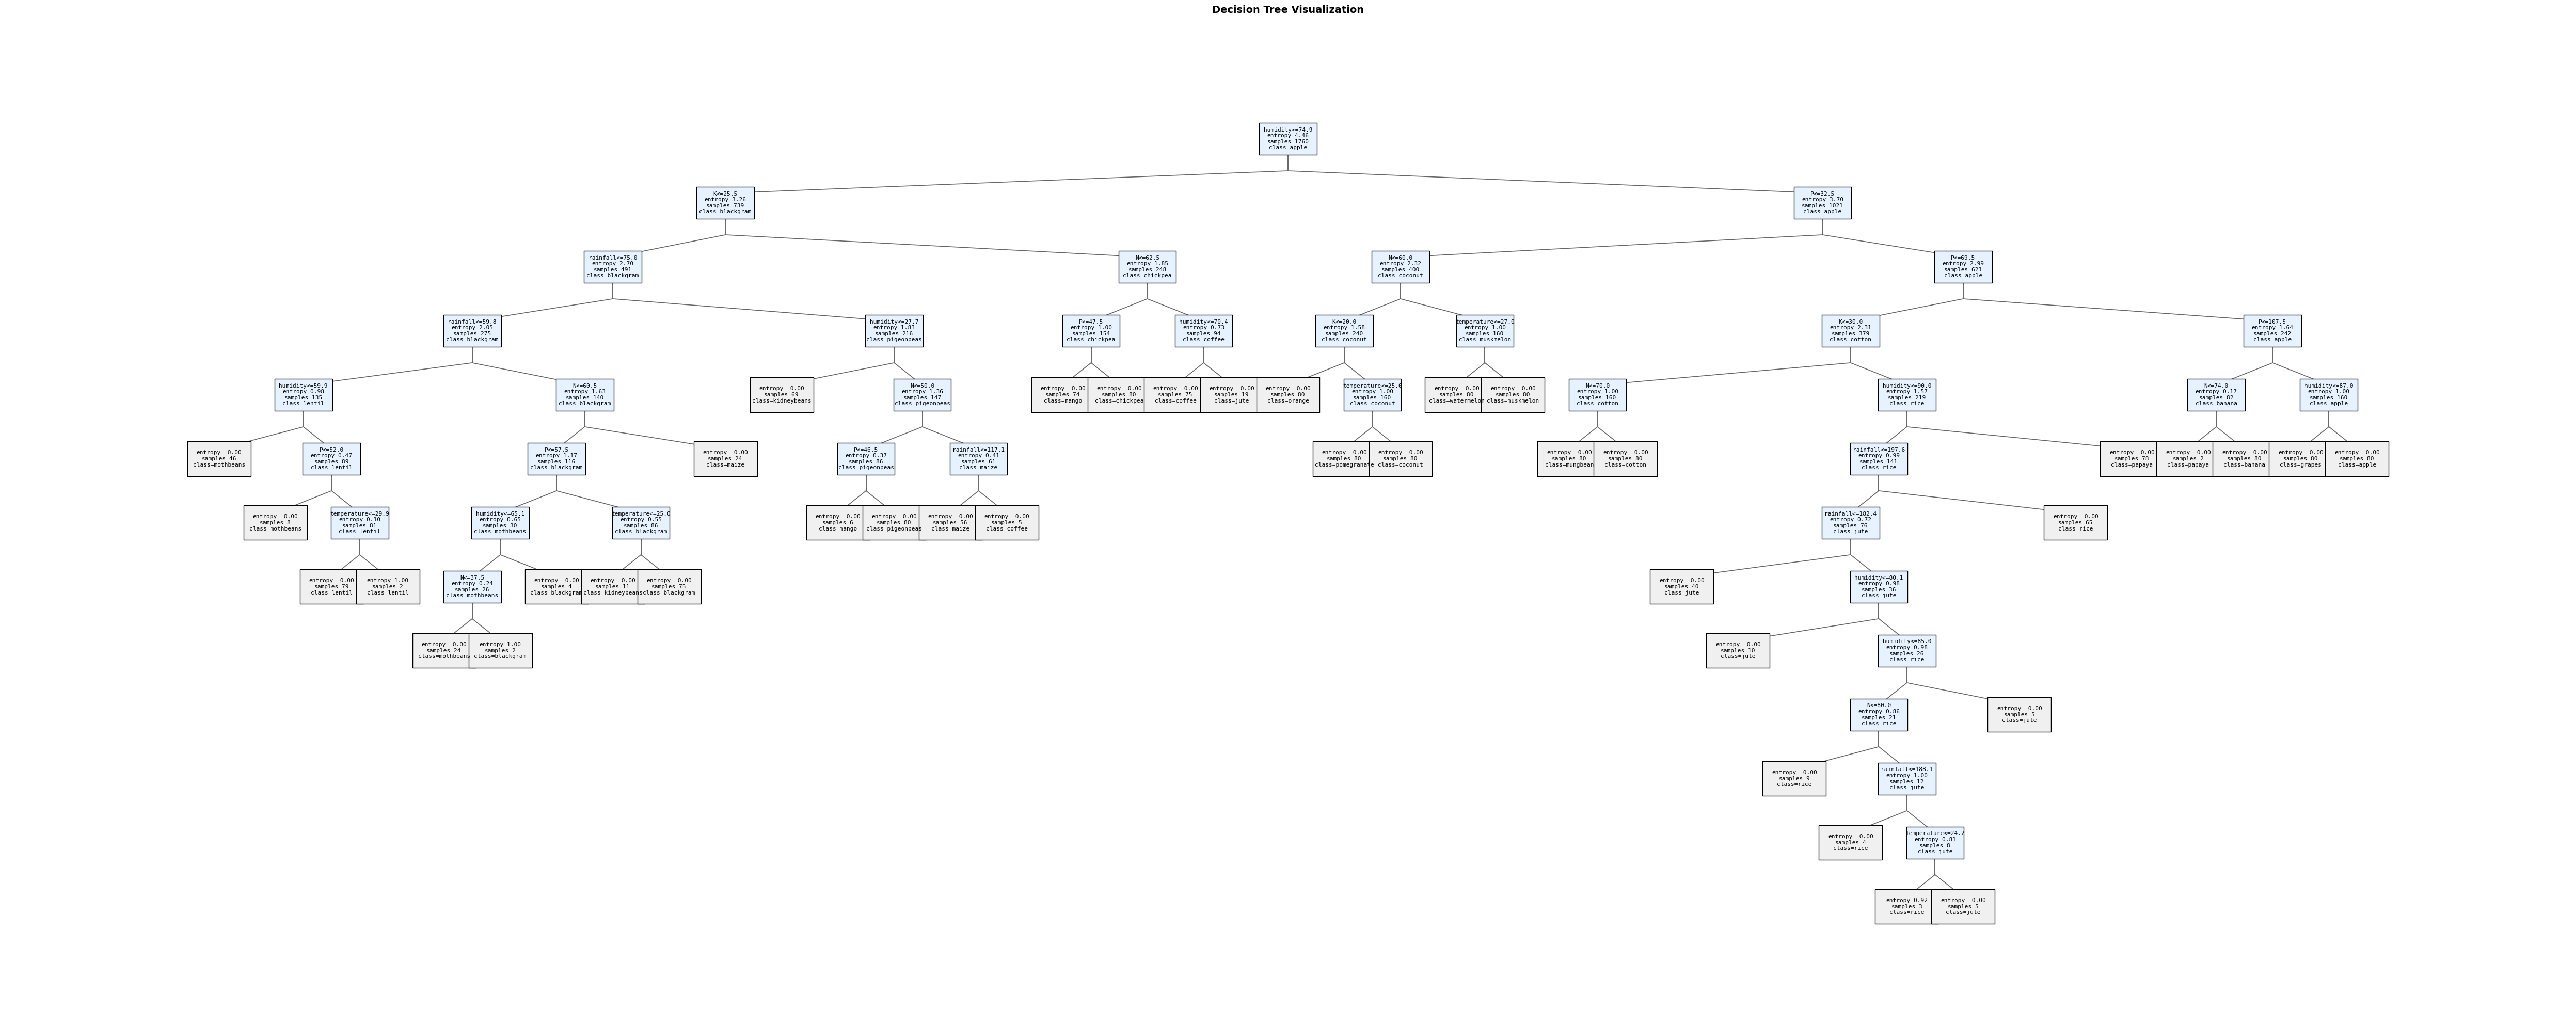

In [ ]:
viz = TreeVisualizer(
    tree_model=clf,
    feature_names=feature_names,
    class_names=encoder.classes_.tolist()
)

print("=" * 70)
print("1. STRUKTUR DECISION TREE")
print("=" * 70)

viz.plot_tree_graph(X_train, y_train, figsize=(50, 20), fontsize=8)

#### Feature Usage


2. PENGGUNAAN FITUR (FEATURE IMPORTANCE)


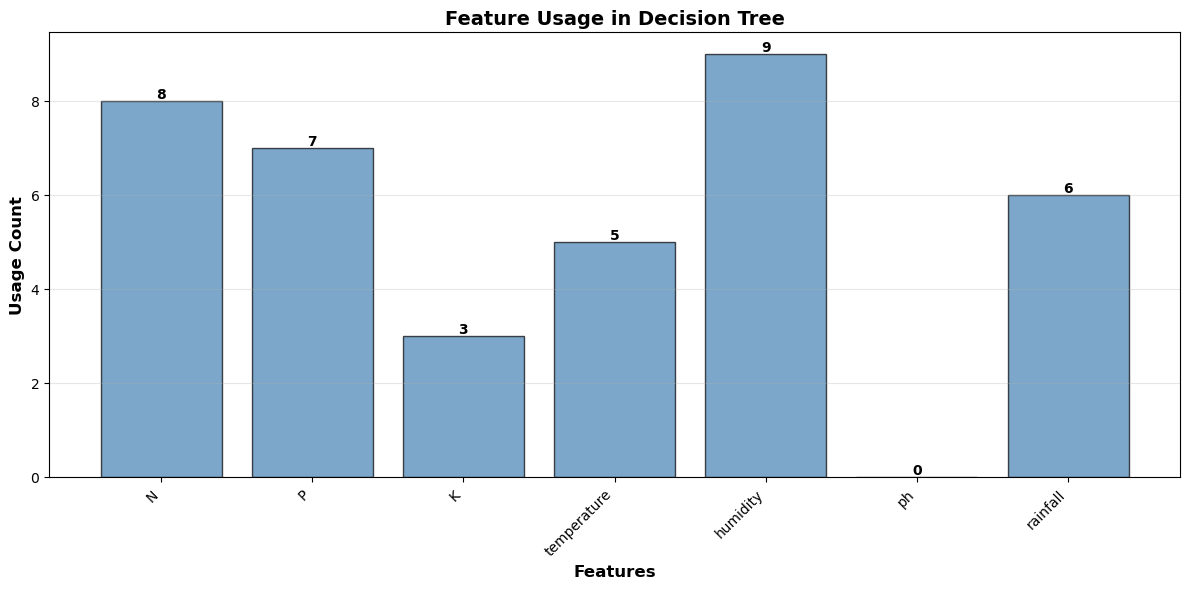

In [ ]:
print("\n" + "=" * 70)
print("2. PENGGUNAAN FITUR (FEATURE IMPORTANCE)")
print("=" * 70)

viz.plot_feature_usage(figsize=(12, 6))

#### Decision Path


3. JALUR KEPUTUSAN UNTUK SAMPEL
Sample Index: 5
------------------------------
N           : 35.00
P           : 66.00
K           : 81.00
temperature : 19.37
humidity    : 15.77
ph          : 6.14
rainfall    : 85.25
------------------------------
Actual Class : chickpea


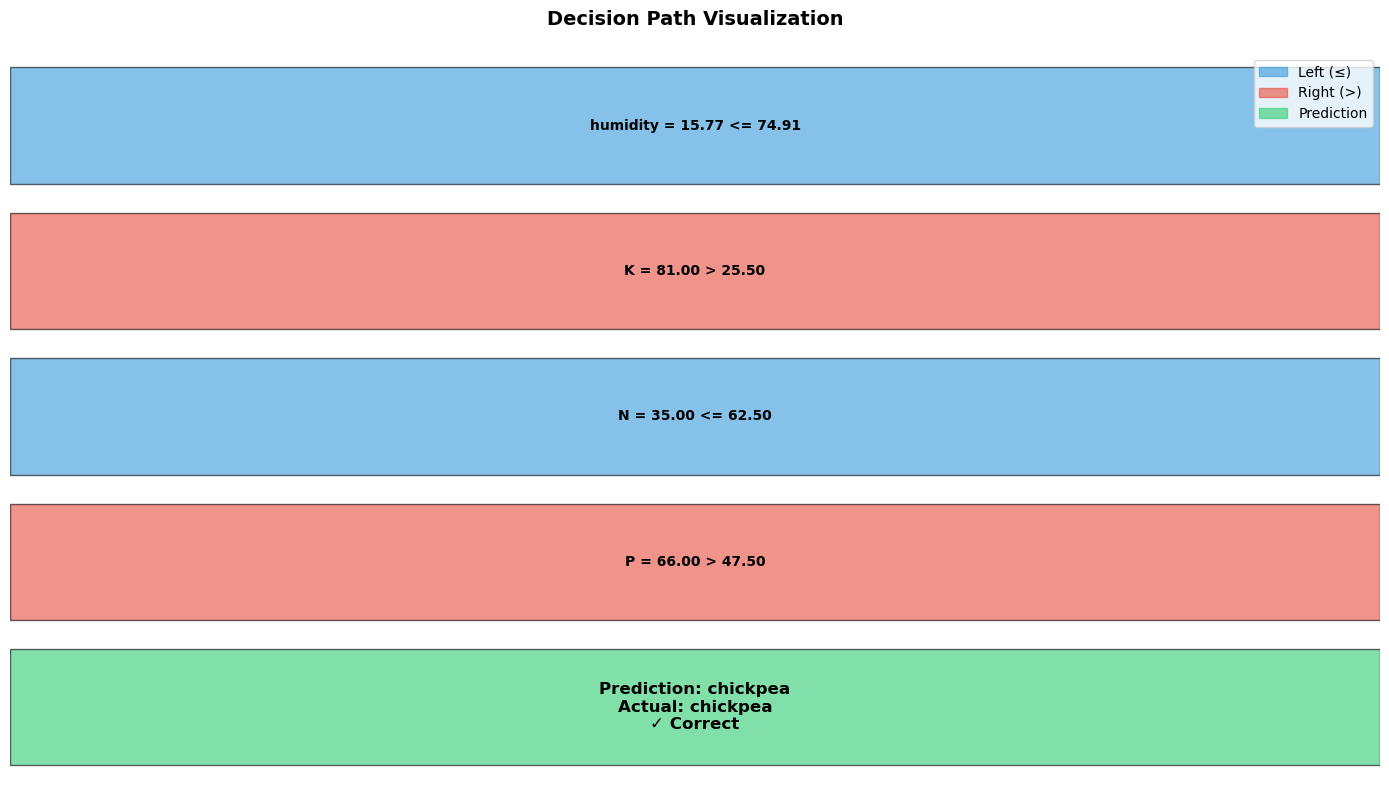

In [38]:
print("\n" + "=" * 70)
print("3. JALUR KEPUTUSAN UNTUK SAMPEL")
print("=" * 70)

sample_idx = 5 
sample_data = X_test[sample_idx]
actual_label = y_test[sample_idx]

print(f"Sample Index: {sample_idx}")
print("-" * 30)

for name, value in zip(feature_names, sample_data):
    print(f"{name:<12}: {value:.2f}")

print("-" * 30)
print(f"Actual Class : {encoder.classes_[actual_label]}")


viz.plot_decision_paths(sample_data, actual_label, figsize=(14, 8))